## Data Dictionary
**Movie Genre Classification**
<br> The data set consists of `id`, `title`, `genre` and `description` in a text file seperated by `:::` and the target feature is `genre`

### Importing necessary libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [65]:
#importing training data
train_data=pd.read_csv('train_data.txt', sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])

In [66]:
train_data.head()

ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [67]:
#importing testing data
test_data=pd.read_csv('test_data.txt', sep=':::', names=['ID','TITLE','DESCRIPTION'])

### Exploring Data

In [68]:
test_data.head()

ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [69]:
train_data.describe()

ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000

In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### Data Cleaning

In [19]:
#removing duplicates abd null values
train_data.drop_duplicates(inplace=True)
train_data.dropna(inplace=True)

In [12]:
#import natural language tool kit and download the stopwords module
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
#importing nltk modules
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [73]:
stopword=set(stopwords.words('English'))

def data_cleaning(text):
    #convert to lowercase
    text=text.lower()
    #remove punctuarions using regular expressions
    text=re.sub(r'[^\w\s]', '', text)
    #remove special characters
    text=re.sub(r'[#@\$]','', text)
    #tokenize
    tokens=word_tokenize(text)
    #Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopword]
    return " ".join(text) 

In [74]:
train_data["CLEAN_DESCRIPTION"]=train_data['DESCRIPTION'].apply(data_cleaning)

In [75]:
train_data.head()

ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                   CLEAN_DESCRIPTION  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

### Data Visualization

In [76]:
ct=train_data['GENRE'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' adventure '),
  Text(11, 0, ' music '),
  Text(12, 0, ' romance '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' adult '),
  Text(15, 0, ' crime '),
  Text(16, 0, ' animation '),
  Text(17, 0, ' sport '),
  Text(18, 0, ' talk-show '),
  Text(19, 0, ' fantasy '),
  Text(20, 0, ' mystery '),
  Text(21, 0, ' musical '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' history '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

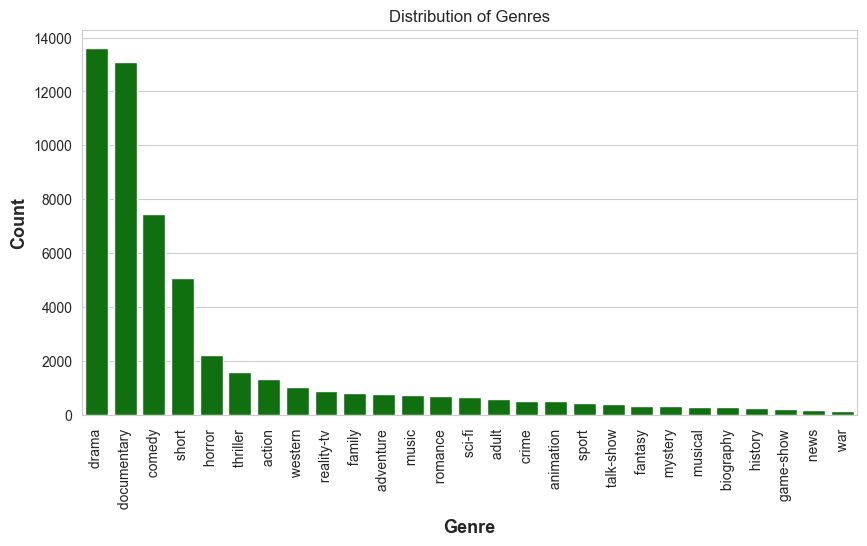

In [25]:
#graph of each genre against their frequency
plt.figure(figsize=(10,5))
sns.barplot(x=ct.index,y=ct,color='green')
plt.xlabel('Genre',fontsize=13, fontweight='bold')
plt.ylabel('Count',fontsize=13,fontweight='bold')
plt.title("Distribution of Genres")
plt.xticks(rotation=90)

In [88]:
train_data['word_count'] = train_data["DESCRIPTION"].apply(lambda x: len(str(x).split(" ")))
train_data['char_count'] = train_data["DESCRIPTION"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
train_data['sentence_count'] = train_data["DESCRIPTION"].apply(lambda x: len(str(x).split(".")))
train_data['avg_word_length'] = train_data['char_count'] / train_data['word_count']
train_data['avg_sentence_lenght'] = train_data['word_count'] / train_data['sentence_count']
train_data.head()

ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                   CLEAN_DESCRIPTION  sentiment  word_count  \
0  listening conversation doctor parents 10yearol...        0.0          93   
1  brother sister past incestuous relationship cu...        0.0          33   
2  bus empties students field trip museum natural...        0.1         115   
3  help unemployed father make ends meet edith tw...        0.0         193   
4  films title refers unrecovered bodies ground z...        0.0         107   

   char_count  sentence_count  avg_word_length  avg_sentence_lenght  
0         454               5         4.881720               18.600  
1         152               3         4.606061               11.000  
2         536               8         4.660870               14.375  
3         890              10         4.611399               19.300  
4         519               4         4.850467               26.750

<Figure size 2000x2000 with 0 Axes>

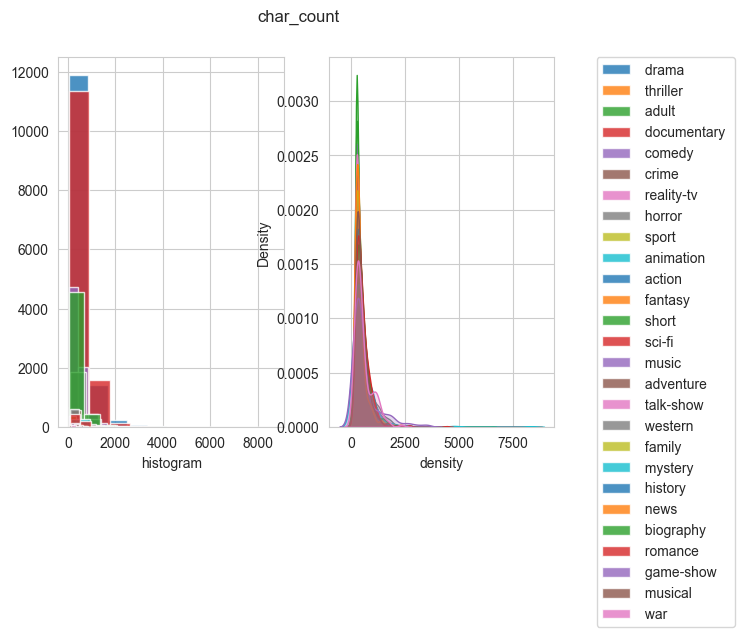

In [89]:
#let'see if char count is correlated w/ target variable
plt.figure(figsize=(20,20))
x, y = "char_count", "GENRE"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in train_data[y].unique():
    sns.distplot(train_data[train_data[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(train_data[train_data[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(train_data[y].unique(), bbox_to_anchor=(3, 1), borderaxespad=0)
plt.show()

These two categories have similair length distribution

In [90]:
train_data["sentiment"] = train_data['GENRE'].apply(lambda x:TextBlob(x).sentiment.polarity)
train_data.head()

ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                   CLEAN_DESCRIPTION  sentiment  word_count  \
0  listening conversation doctor parents 10yearol...        0.0          93   
1  brother sister past incestuous relationship cu...        0.0          33   
2  bus empties students field trip museum natural...        0.1         115   
3  help unemployed father make ends meet edith tw...        0.0         193   
4  films title refers unrecovered bodies ground z...        0.0         107   

   char_count  sentence_count  avg_word_length  avg_sentence_lenght  
0         454               5         4.881720               18.600  
1         152               3         4.606061               11.000  
2         536               8         4.660870               14.375  
3         890              10         4.611399               19.300  
4         519               4         4.850467               26.750

<Figure size 2000x2000 with 0 Axes>

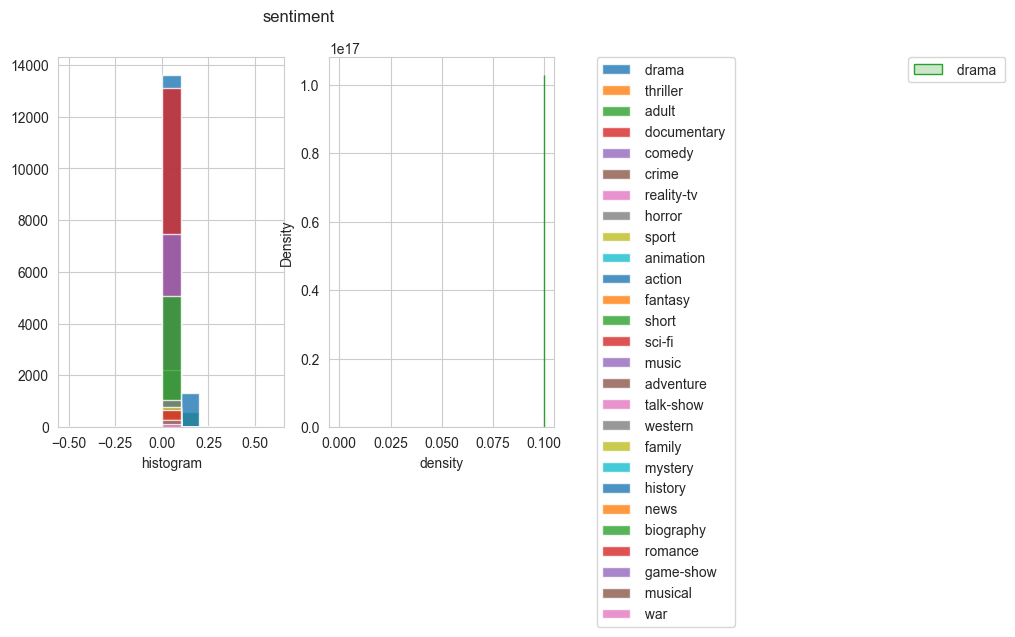

In [91]:
#let'see if sentiment is correlated w/ target variable
plt.figure(figsize=(20,20))
x, y = "sentiment", "GENRE"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in train_data[y].unique():
    sns.distplot(train_data[train_data[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(train_data[train_data[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(train_data[y].unique(), bbox_to_anchor=(3, 1), borderaxespad=0)
ax[1].legend(train_data[y].unique(), bbox_to_anchor=(3., 1), borderaxespad=0)
plt.show()

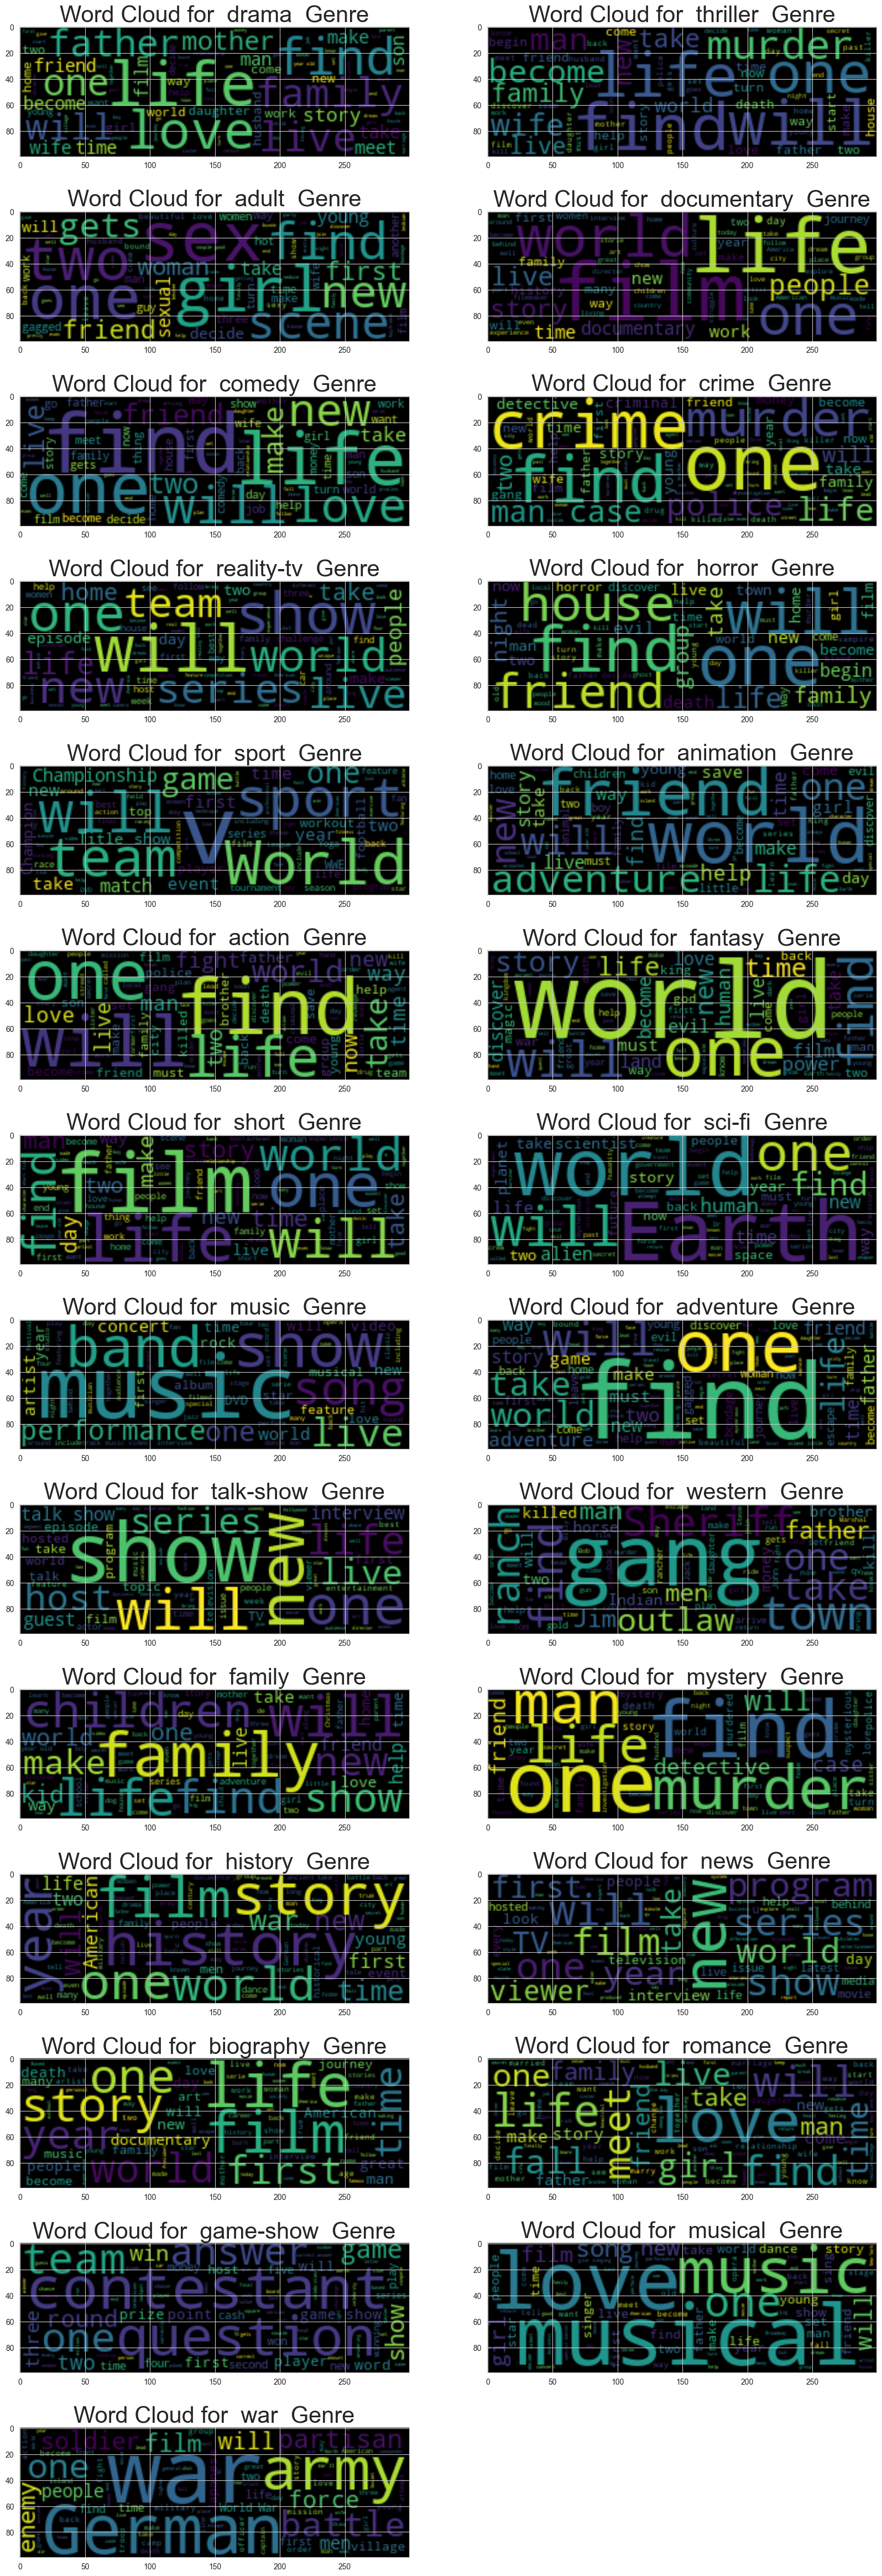

In [30]:
#wordcloud
genres = train_data['GENRE'].unique()

# Set the figure size outside the loop
plt.figure(figsize=(20, 60))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(train_data[train_data["GENRE"] == genre]['DESCRIPTION']))
    wordcloud = WordCloud(max_words=300, width=300, height=100).generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)

In [38]:
data = train_data.drop(["TITLE","ID"] , axis = 1) # will drop column 
data.head()

GENRE                                        DESCRIPTION  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

                                   CLEAN_DESCRIPTION  word_count  char_count  \
0  listening conversation doctor parents 10yearol...          93         454   
1  brother sister past incestuous relationship cu...          33         152   
2  bus empties students field trip museum natural...         115         536   
3  help unemployed father make ends meet edith tw...         193         890   
4  films title refers unrecovered bodies ground z...         107         519   

   sentence_count  avg_word_length  avg_sentence_lenght  sentiment  
0               5         4.881720               18.600   0.192975  
1               3         4.606061               11.000  -0.125000  
2               8         4.660870               14.375   0.367500  
3              10         4.611399               19.300   0.040909  
4               4         4.850467               26.750   0.145536

### Training the model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [40]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['GENRE_ENCODED'] = label_encoder.fit_transform(data['GENRE'])
data['GENRE_ENCODED']

class_names= list(label_encoder.classes_)
class_names   

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

### Splitting Data

In [43]:
## Split the data
x = data["CLEAN_DESCRIPTION"]
y = data["GENRE"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [82]:
## Using TfidfVectorizer technique
vectorize = TfidfVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1=  vectorize.transform(x_test)
y_pred

### Predicting

**1.)Multinomial**

In [84]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))
 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model Score on Training data 0.47198140701663777
Model Score on Training data 0.4409193197329103
               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.03      0.59      0.05       177
       crime        0.00      0.00      0.00         0
 documentary        0.89      0.55      0.68     10816
       drama        0.89      0.37      0.52     16114
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.

**2.) Logistic Regression**

In [85]:
## select Logistic regression for this
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Training data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model Score on Training data 0.7124727930054967
Model Score on Training data 0.5614785848673775
               precision    recall  f1-score   support

      action        0.12      0.59      0.20       132
       adult        0.12      0.86      0.20        42
   adventure        0.12      0.64      0.20        67
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.54      0.53      0.54      3763
       crime        0.00      0.00      0.00         0
 documentary        0.88      0.63      0.74      9204
       drama        0.81      0.50      0.62     10876
      family        0.03      0.52      0.05        21
     fantasy        0.00      0.00      0.00         1
   game-show        0.32      0.94      0.48        35
     history        0.00      0.00      0.00         0
      horror        0.50      0.69      0.58       784
       music        0.30      0.76      0.43       146
     musical        0.0

**3.) SVC Model**

Model Score on Training data 0.9939130113992696
Model Score on Training data 0.5703323864684399
               precision    recall  f1-score   support

      action        0.25      0.46      0.33       366
       adult        0.35      0.71      0.47       154
   adventure        0.21      0.55      0.31       142
   animation        0.13      0.39      0.19        79
   biography        0.00      0.00      0.00         5
      comedy        0.56      0.51      0.54      4063
       crime        0.03      0.21      0.05        33
 documentary        0.83      0.68      0.75      8110
       drama        0.71      0.54      0.61      8943
      family        0.12      0.42      0.19       120
     fantasy        0.07      0.33      0.12        36
   game-show        0.65      0.85      0.73        78
     history        0.00      0.00      0.00         3
      horror        0.63      0.62      0.62      1097
       music        0.46      0.60      0.52       279
     musical        0.0

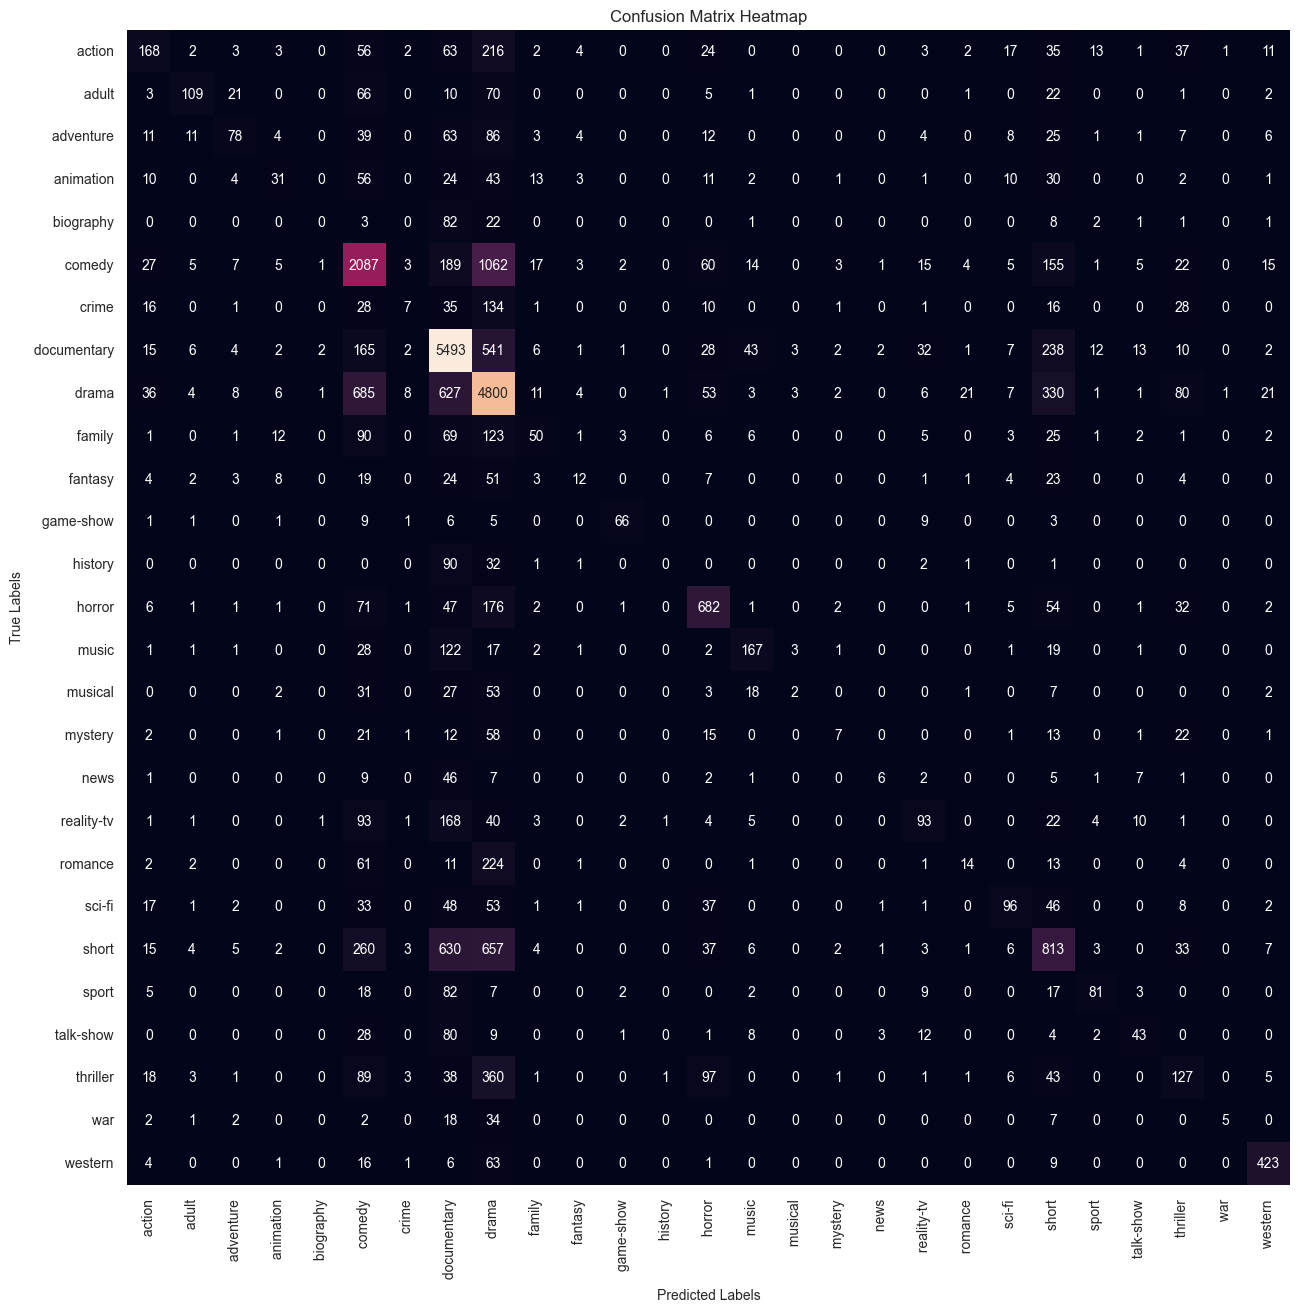

In [86]:
# Select SVC model

svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Testing data",svm.score(x_test1 ,y_test))
y_pred= svm.predict(x_test1)
print(classification_report(y_pred ,y_test))
## As we can see from accuracy that the model the not performing well



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

**4.)Random Forest Classifier**

Random Forest - Train Score: 0.9998155457999779
Random Forest - Test Score: 0.4783266314973992
               precision    recall  f1-score   support

      action        0.01      0.67      0.01         6
       adult        0.05      0.67      0.08        21
   adventure        0.06      0.66      0.11        32
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.26      0.54      0.35      1772
       crime        0.01      1.00      0.01         2
 documentary        0.88      0.55      0.68     10558
       drama        0.84      0.40      0.54     14089
      family        0.01      0.86      0.03         7
     fantasy        0.00      0.00      0.00         2
   game-show        0.28      1.00      0.44        29
     history        0.00      0.00      0.00         0
      horror        0.08      0.77      0.15       115
       music        0.07      0.93      0.13        28
     musical        0.00

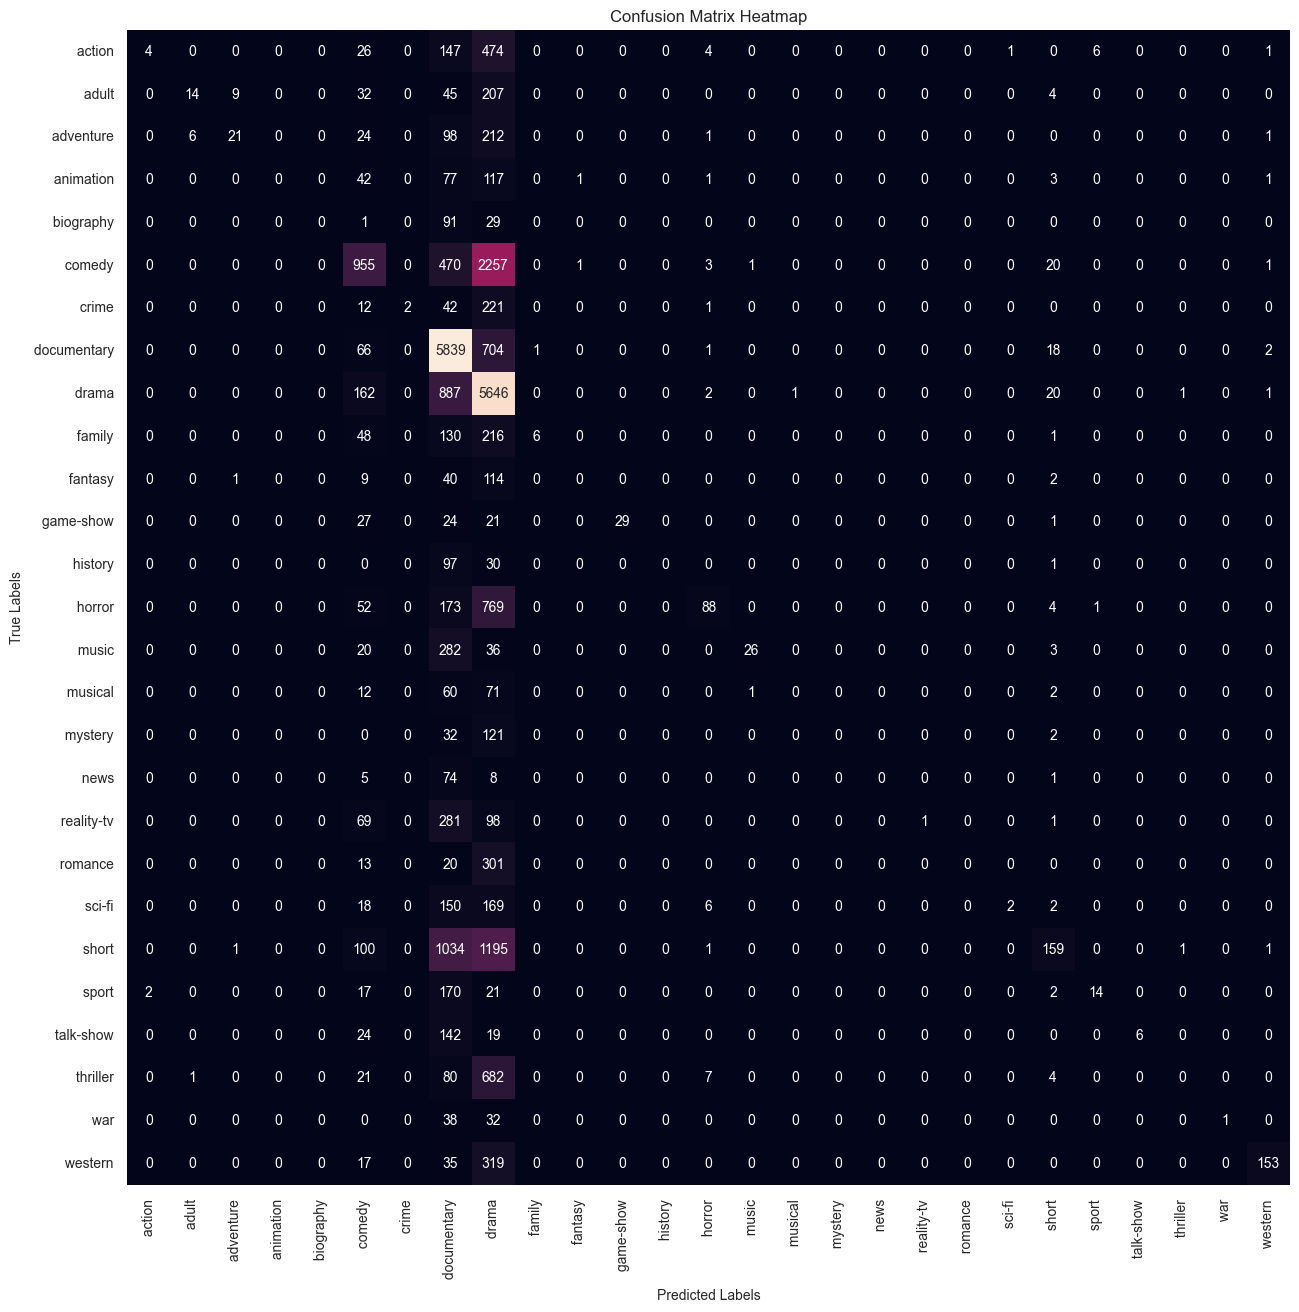

In [87]:
# Create a Random Forest model
random_forest = RandomForestClassifier()

# Fit the model with GridSearchCV
random_forest.fit(x_train1, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train1, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test1, y_test))

y_pred= random_forest.predict(x_test1)
print(classification_report(y_pred ,y_test))



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Hence, best model for prediction as observed is **Logistic Regression** since it has good training score and testing score, others have too high testing score and low training score.